In [1]:
import numpy as np
import cv2
import pandas as pd

In [2]:
img = cv2.imread('image/56.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [3]:
df = pd.DataFrame()
df

""


In [4]:
img2 = img.reshape(-1)
df['Original Image'] = img2
df.head()

,Original Image
0,209
1,209
2,208
3,207
4,208


In [5]:
num = 1  #To count numbers up in order to give Gabor features a lable in the data frame
kernels = []
for theta in range(2):   #Define number of thetas
    theta = theta / 4. * np.pi
    for sigma in (1, 3):  #Sigma with 1 and 3
        for lamda in np.arange(0, np.pi, np.pi / 4):   #Range of wavelengths
            for gamma in (0.05, 0.5):   #Gamma values of 0.05 and 0.5
            
                
                gabor_label = 'Gabor' + str(num)  #Label Gabor columns as Gabor1, Gabor2, etc.
#                print(gabor_label)
                ksize=9
                kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lamda, gamma, 0, ktype=cv2.CV_32F)    
                kernels.append(kernel)
                #Now filter the image and add values to a new column 
                fimg = cv2.filter2D(img2, cv2.CV_8UC3, kernel)
                filtered_img = fimg.reshape(-1)
                df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
                print(gabor_label, ': theta=', theta, ': sigma=', sigma, ': lamda=', lamda, ': gamma=', gamma)
                num += 1  #Increment for gabor column label

Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.0 : gamma= 0.05
Gabor2 : theta= 0.0 : sigma= 1 : lamda= 0.0 : gamma= 0.5
Gabor3 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.05
Gabor4 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor5 : theta= 0.0 : sigma= 1 : lamda= 1.5707963267948966 : gamma= 0.05
Gabor6 : theta= 0.0 : sigma= 1 : lamda= 1.5707963267948966 : gamma= 0.5
Gabor7 : theta= 0.0 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.05
Gabor8 : theta= 0.0 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.5
Gabor9 : theta= 0.0 : sigma= 3 : lamda= 0.0 : gamma= 0.05
Gabor10 : theta= 0.0 : sigma= 3 : lamda= 0.0 : gamma= 0.5
Gabor11 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.05
Gabor12 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor13 : theta= 0.0 : sigma= 3 : lamda= 1.5707963267948966 : gamma= 0.05
Gabor14 : theta= 0.0 : sigma= 3 : lamda= 1.5707963267948966 : gamma= 0.5
Gabor15 : theta= 0.0 : sigma= 3 : lamda= 2

In [6]:
df.head()

,Original Image,Gabor1,Gabor2,Gabor3,Gabor4,Gabor5,Gabor6,Gabor7,Gabor8,Gabor9,...,Gabor23,Gabor24,Gabor25,Gabor26,Gabor27,Gabor28,Gabor29,Gabor30,Gabor31,Gabor32
0,209,0,0,255,255,255,190,140,77,0,...,255,77,0,0,255,255,98,52,174,104
1,209,0,0,255,255,255,190,140,77,0,...,255,77,0,0,255,255,97,51,174,104
2,208,0,0,255,255,255,190,140,77,0,...,255,76,0,0,255,255,98,52,175,105
3,207,0,0,255,255,255,190,140,77,0,...,255,76,0,0,255,255,98,52,176,105
4,208,0,0,255,255,255,190,140,77,0,...,255,76,0,0,255,255,97,51,174,104


In [7]:
#CANNY EDGE
edges = cv2.Canny(img, 100,200)   #Image, min and max values
edges1 = edges.reshape(-1)
df['Canny Edge'] = edges1 #Add column to original dataframe

In [8]:
df.head()

,Original Image,Gabor1,Gabor2,Gabor3,Gabor4,Gabor5,Gabor6,Gabor7,Gabor8,Gabor9,...,Gabor24,Gabor25,Gabor26,Gabor27,Gabor28,Gabor29,Gabor30,Gabor31,Gabor32,Canny Edge
0,209,0,0,255,255,255,190,140,77,0,...,77,0,0,255,255,98,52,174,104,0
1,209,0,0,255,255,255,190,140,77,0,...,77,0,0,255,255,97,51,174,104,0
2,208,0,0,255,255,255,190,140,77,0,...,76,0,0,255,255,98,52,175,105,0
3,207,0,0,255,255,255,190,140,77,0,...,76,0,0,255,255,98,52,176,105,0
4,208,0,0,255,255,255,190,140,77,0,...,76,0,0,255,255,97,51,174,104,0


In [9]:
from skimage.filters import roberts, sobel, scharr, prewitt

#ROBERTS EDGE
edge_roberts = roberts(img)
edge_roberts1 = edge_roberts.reshape(-1)
df['Roberts'] = edge_roberts1

#SOBEL
edge_sobel = sobel(img)
edge_sobel1 = edge_sobel.reshape(-1)
df['Sobel'] = edge_sobel1

#SCHARR
edge_scharr = scharr(img)
edge_scharr1 = edge_scharr.reshape(-1)
df['Scharr'] = edge_scharr1

#PREWITT
edge_prewitt = prewitt(img)
edge_prewitt1 = edge_prewitt.reshape(-1)
df['Prewitt'] = edge_prewitt1

In [10]:
df.head()

,Original Image,Gabor1,Gabor2,Gabor3,Gabor4,Gabor5,Gabor6,Gabor7,Gabor8,Gabor9,...,Gabor28,Gabor29,Gabor30,Gabor31,Gabor32,Canny Edge,Roberts,Sobel,Scharr,Prewitt
0,209,0,0,255,255,255,190,140,77,0,...,255,98,52,174,104,0,0.002773,0.000980,0.000735,0.001307
1,209,0,0,255,255,255,190,140,77,0,...,255,97,51,174,104,0,0.005546,0.004042,0.003990,0.004134
2,208,0,0,255,255,255,190,140,77,0,...,255,98,52,175,105,0,0.005546,0.006201,0.006201,0.006201
3,207,0,0,255,255,255,190,140,77,0,...,255,98,52,176,105,0,0.006201,0.003535,0.003334,0.003811
4,208,0,0,255,255,255,190,140,77,0,...,255,97,51,174,104,0,0.008769,0.006863,0.007108,0.006536


In [11]:
#GAUSSIAN with sigma=3
from scipy import ndimage as nd
gaussian_img = nd.gaussian_filter(img, sigma=3)
gaussian_img1 = gaussian_img.reshape(-1)
df['Gaussian s3'] = gaussian_img1

In [12]:
#GAUSSIAN with sigma=7
gaussian_img2 = nd.gaussian_filter(img, sigma=7)
gaussian_img3 = gaussian_img2.reshape(-1)
df['Gaussian s7'] = gaussian_img3

In [13]:
#MEDIAN with sigma=3
median_img = nd.median_filter(img, size=3)
median_img1 = median_img.reshape(-1)
df['Median s3'] = median_img1

In [14]:
# #VARIANCE with size=3
# variance_img = nd.generic_filter(img, np.var, size=3)
# variance_img1 = variance_img.reshape(-1)
# df['Variance s3'] = variance_img1  #Add column to original dataframe

In [15]:
df.head()

,Original Image,Gabor1,Gabor2,Gabor3,Gabor4,Gabor5,Gabor6,Gabor7,Gabor8,Gabor9,...,Gabor31,Gabor32,Canny Edge,Roberts,Sobel,Scharr,Prewitt,Gaussian s3,Gaussian s7,Median s3
0,209,0,0,255,255,255,190,140,77,0,...,174,104,0,0.002773,0.000980,0.000735,0.001307,207,207,209
1,209,0,0,255,255,255,190,140,77,0,...,174,104,0,0.005546,0.004042,0.003990,0.004134,207,207,209
2,208,0,0,255,255,255,190,140,77,0,...,175,105,0,0.005546,0.006201,0.006201,0.006201,207,207,208
3,207,0,0,255,255,255,190,140,77,0,...,176,105,0,0.006201,0.003535,0.003334,0.003811,207,207,207
4,208,0,0,255,255,255,190,140,77,0,...,174,104,0,0.008769,0.006863,0.007108,0.006536,207,207,207


In [16]:
labeled_img = cv2.imread('image/labeled/56_mask.png')
labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_BGR2GRAY)
labeled_img1 = labeled_img.reshape(-1)
df['Labels'] = labeled_img1
df.head()

,Original Image,Gabor1,Gabor2,Gabor3,Gabor4,Gabor5,Gabor6,Gabor7,Gabor8,Gabor9,...,Gabor32,Canny Edge,Roberts,Sobel,Scharr,Prewitt,Gaussian s3,Gaussian s7,Median s3,Labels
0,209,0,0,255,255,255,190,140,77,0,...,104,0,0.002773,0.000980,0.000735,0.001307,207,207,209,0
1,209,0,0,255,255,255,190,140,77,0,...,104,0,0.005546,0.004042,0.003990,0.004134,207,207,209,0
2,208,0,0,255,255,255,190,140,77,0,...,105,0,0.005546,0.006201,0.006201,0.006201,207,207,208,0
3,207,0,0,255,255,255,190,140,77,0,...,105,0,0.006201,0.003535,0.003334,0.003811,207,207,207,0
4,208,0,0,255,255,255,190,140,77,0,...,104,0,0.008769,0.006863,0.007108,0.006536,207,207,207,0


In [17]:
df.to_csv('coffee_dataframe.csv', index=False)

In [18]:
y = df['Labels'].values
y

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [20]:
X = df.drop('Labels', axis='columns')
X.head()

,Original Image,Gabor1,Gabor2,Gabor3,Gabor4,Gabor5,Gabor6,Gabor7,Gabor8,Gabor9,...,Gabor31,Gabor32,Canny Edge,Roberts,Sobel,Scharr,Prewitt,Gaussian s3,Gaussian s7,Median s3
0,209,0,0,255,255,255,190,140,77,0,...,174,104,0,0.002773,0.000980,0.000735,0.001307,207,207,209
1,209,0,0,255,255,255,190,140,77,0,...,174,104,0,0.005546,0.004042,0.003990,0.004134,207,207,209
2,208,0,0,255,255,255,190,140,77,0,...,175,105,0,0.005546,0.006201,0.006201,0.006201,207,207,208
3,207,0,0,255,255,255,190,140,77,0,...,176,105,0,0.006201,0.003535,0.003334,0.003811,207,207,207
4,208,0,0,255,255,255,190,140,77,0,...,174,104,0,0.008769,0.006863,0.007108,0.006536,207,207,207


In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)

In [22]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=40)

In [23]:
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=40)

In [24]:
model.score(X_test, y_test)

0.9573533011415475

In [25]:
y_predicted = model.predict(X_test)
from sklearn.metrics import accuracy_score
ac = accuracy_score(y_test, y_predicted)
print("Accuracy:", ac)

Accuracy: 0.9573533011415475


In [26]:
importances = list(model.feature_importances_)
importances

[0.06755364717920571,
 0.0,
 0.0,
 1.937647161947329e-06,
 0.002127389320175413,
 0.08572293255255174,
 0.013884569103066971,
 0.1226261920237319,
 0.024283295279649852,
 0.0,
 0.0,
 0.0005467730635617514,
 0.0008601235966991489,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.08571552109912932,
 0.0003079629251180614,
 0.008395841058980774,
 0.02597654526921067,
 0.0,
 0.0,
 0.0,
 0.0,
 0.13040351288016752,
 0.06242611580433973,
 0.029627112638008723,
 0.009819402498034455,
 0.0005646628057046981,
 0.017063022071475517,
 0.01871478516382124,
 0.03059090769727276,
 0.02154656839550558,
 0.033884381141046686,
 0.0241855309770452,
 0.18317126780933454]

In [27]:
len(importances)

41

In [28]:
feature_names = list(X.columns)
feature_names

['Original Image',
 'Gabor1',
 'Gabor2',
 'Gabor3',
 'Gabor4',
 'Gabor5',
 'Gabor6',
 'Gabor7',
 'Gabor8',
 'Gabor9',
 'Gabor10',
 'Gabor11',
 'Gabor12',
 'Gabor13',
 'Gabor14',
 'Gabor15',
 'Gabor16',
 'Gabor17',
 'Gabor18',
 'Gabor19',
 'Gabor20',
 'Gabor21',
 'Gabor22',
 'Gabor23',
 'Gabor24',
 'Gabor25',
 'Gabor26',
 'Gabor27',
 'Gabor28',
 'Gabor29',
 'Gabor30',
 'Gabor31',
 'Gabor32',
 'Canny Edge',
 'Roberts',
 'Sobel',
 'Scharr',
 'Prewitt',
 'Gaussian s3',
 'Gaussian s7',
 'Median s3']

In [29]:
len(feature_names)

41

In [30]:
feature_imp = pd.Series(model.feature_importances_, index=feature_names).sort_values(ascending=False)

In [31]:
feature_imp

Median s3         0.183171
Gabor29           0.130404
Gabor7            0.122626
Gabor5            0.085723
Gabor21           0.085716
Original Image    0.067554
Gabor30           0.062426
Gaussian s3       0.033884
Scharr            0.030591
Gabor31           0.029627
Gabor24           0.025977
Gabor8            0.024283
Gaussian s7       0.024186
Prewitt           0.021547
Sobel             0.018715
Roberts           0.017063
Gabor6            0.013885
Gabor32           0.009819
Gabor23           0.008396
Gabor4            0.002127
Gabor12           0.000860
Canny Edge        0.000565
Gabor11           0.000547
Gabor22           0.000308
Gabor3            0.000002
Gabor19           0.000000
Gabor15           0.000000
Gabor9            0.000000
Gabor10           0.000000
Gabor13           0.000000
Gabor14           0.000000
Gabor17           0.000000
Gabor16           0.000000
Gabor1            0.000000
Gabor2            0.000000
Gabor28           0.000000
Gabor27           0.000000
G

In [32]:
import pickle
filename = 'random_forest_model'
pickle.dump(model, open(filename, 'wb'))

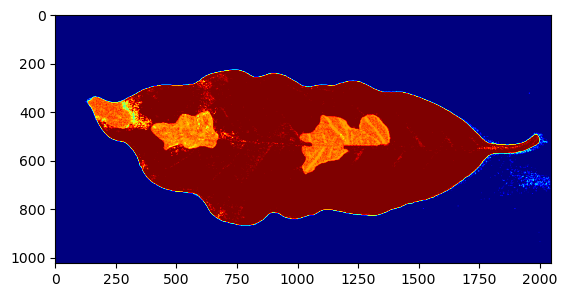

In [33]:
load_model = pickle.load(open(filename, 'rb'))
result = load_model.predict(X)

segmented = result.reshape((img.shape))

from matplotlib import pyplot as plt
plt.imshow(segmented, cmap='jet')
plt.imsave('segmented_coffee_leaf.jpg', segmented, cmap='jet')